In [ ]:
# lets create an np array and fill with random rgb values
import numpy as np
from PIL import Image

# create 4 x 6 array
a = np.zeros([4, 6, 3], dtype=np.uint8)

# fill with random rgb values
for i in range(4):
    for j in range(6):
        a[i, j, 0] = np.random.randint(0, 256)
        a[i, j, 1] = np.random.randint(0, 256)
        a[i, j, 2] = np.random.randint(0, 256)

# create an image from the array
img = Image.fromarray(a)
img.save('test.png')
img.show()

print(a)

In [30]:
# load image from file
img = Image.open('hand_written.png')
a = np.array(img)
#print(a)
# average the every group of 4 pixels
image_size = a.shape
print(image_size)
# create a new array to store the averaged values
b = np.zeros([int(image_size[0]/2), int(image_size[1]/2), 3], dtype=np.uint8)

def avg_image(image, image_size, step=2):
    b = np.zeros([int(image_size[0]/2), int(image_size[1]/2), 3], dtype=np.uint8)
    for i in range(0, image_size[0], 2):
        for j in range(0, image_size[1], 2):
            b[int(i/2), int(j/2), 0] = (int(a[i, j, 0]) + int(a[i+1, j, 0]) + int(a[i, j+1, 0]) + int(a[i+1, j+1, 0])) / 4
            b[int(i/2), int(j/2), 1] = (int(a[i, j, 1]) + int(a[i+1, j, 1]) + int(a[i, j+1, 1]) + int(a[i+1, j+1, 1])) / 4
            b[int(i/2), int(j/2), 2] = (int(a[i, j, 2]) + int(a[i+1, j, 2]) + int(a[i, j+1, 2]) + int(a[i+1, j+1, 2])) / 4

    return b
    # create an image from the array

b = avg_image(a, image_size)
img = Image.fromarray(b)
img.save('hand_written_averaged.png')
img.show()
print(b)

(1836, 3264, 3)
[[[243 240 231]
  [243 240 231]
  [243 240 231]
  ...
  [180 180 170]
  [181 181 171]
  [184 184 174]]

 [[242 239 230]
  [242 239 230]
  [243 240 231]
  ...
  [184 184 174]
  [186 186 176]
  [186 186 176]]

 [[241 238 229]
  [241 238 229]
  [242 239 230]
  ...
  [183 183 173]
  [185 185 175]
  [185 185 175]]

 ...

 [[228 228 218]
  [230 230 220]
  [229 229 219]
  ...
  [187 187 179]
  [183 183 175]
  [183 183 175]]

 [[227 227 217]
  [230 230 220]
  [230 230 220]
  ...
  [183 183 175]
  [181 181 173]
  [183 183 175]]

 [[227 227 217]
  [230 230 220]
  [230 230 220]
  ...
  [182 182 174]
  [178 178 170]
  [176 176 168]]]


In [ ]:
# only keep the most dominant rgb value of the group of 4 pixels

def dominant_image(image, image_size):
    a = image
    b = np.zeros([int(image_size[0]/2), int(image_size[1]/2), 3], dtype=np.uint8)
    for i in range(0, image_size[0], 2):
        for j in range(0, image_size[1], 2):
            b[int(i/2), int(j/2), 0] = max(int(a[i, j, 0]), int(a[i+1, j, 0]), int(a[i, j+1, 0]), int(a[i+1, j+1, 0]))
            b[int(i/2), int(j/2), 1] = max(int(a[i, j, 1]), int(a[i+1, j, 1]), int(a[i, j+1, 1]), int(a[i+1, j+1, 1]))
            b[int(i/2), int(j/2), 2] = max(int(a[i, j, 2]), int(a[i+1, j, 2]), int(a[i, j+1, 2]), int(a[i+1, j+1, 2]))

    return b

b = dominant_image(a, image_size)
img = Image.fromarray(b)
img.save('dominant.png')
img.show()
print(b)

In [ ]:
# remove channels with the lowest value

def remove_channel(image, image_size):
    a = image
    b = np.zeros([int(image_size[0]/2), int(image_size[1]/2), 3], dtype=np.uint8)
    for i in range(0, image_size[0], 2):
        for j in range(0, image_size[1], 2):
            b[int(i/2), int(j/2), 0] = max(int(a[i, j, 0]), int(a[i+1, j, 0]), int(a[i, j+1, 0]), int(a[i+1, j+1, 0]))
            b[int(i/2), int(j/2), 1] = max(int(a[i, j, 1]), int(a[i+1, j, 1]), int(a[i, j+1, 1]), int(a[i+1, j+1, 1]))
            b[int(i/2), int(j/2), 2] = max(int(a[i, j, 2]), int(a[i+1, j, 2]), int(a[i, j+1, 2]), int(a[i+1, j+1, 2]))

    return b

b = remove_channel(a, image_size)
img = Image.fromarray(b)
img.save('remove_channel.png')
img.show()
print(b)

In [30]:
# only keep the most dominant rgb value and channel of the group of 4 pixels

def dominant_channel_image(image, image_size):
    a = image
    b = np.zeros([int(image_size[0]/2), int(image_size[1]/2), 3], dtype=np.uint8)
    for i in range(0, image_size[0], 3):
        for j in range(0, image_size[1], 3):
            b[int(i/2), int(j/2), 0] = max(int(a[i, j, 0]), int(a[i+1, j, 0]), int(a[i, j+1, 0]), int(a[i+1, j+1, 0]))
            b[int(i/2), int(j/2), 1] = max(int(a[i, j, 1]), int(a[i+1, j, 1]), int(a[i, j+1, 1]), int(a[i+1, j+1, 1]))
            b[int(i/2), int(j/2), 2] = max(int(a[i, j, 2]), int(a[i+1, j, 2]), int(a[i, j+1, 2]), int(a[i+1, j+1, 2]))
            if b[int(i/2), int(j/2), 0] == int(a[i, j, 0]):
                b[int(i/2), int(j/2), 1] = 0
                b[int(i/2), int(j/2), 2] = 0
            elif b[int(i/2), int(j/2), 1] == int(a[i, j, 1]):
                b[int(i/2), int(j/2), 0] = 0
                b[int(i/2), int(j/2), 2] = 0
            else:
                b[int(i/2), int(j/2), 0] = 0
                b[int(i/2), int(j/2), 1] = 0

    return b

b = dominant_channel_image(a, image_size)
img = Image.fromarray(b)

[188.86418851990686, 188.80342012553933, 187.2690448251741]


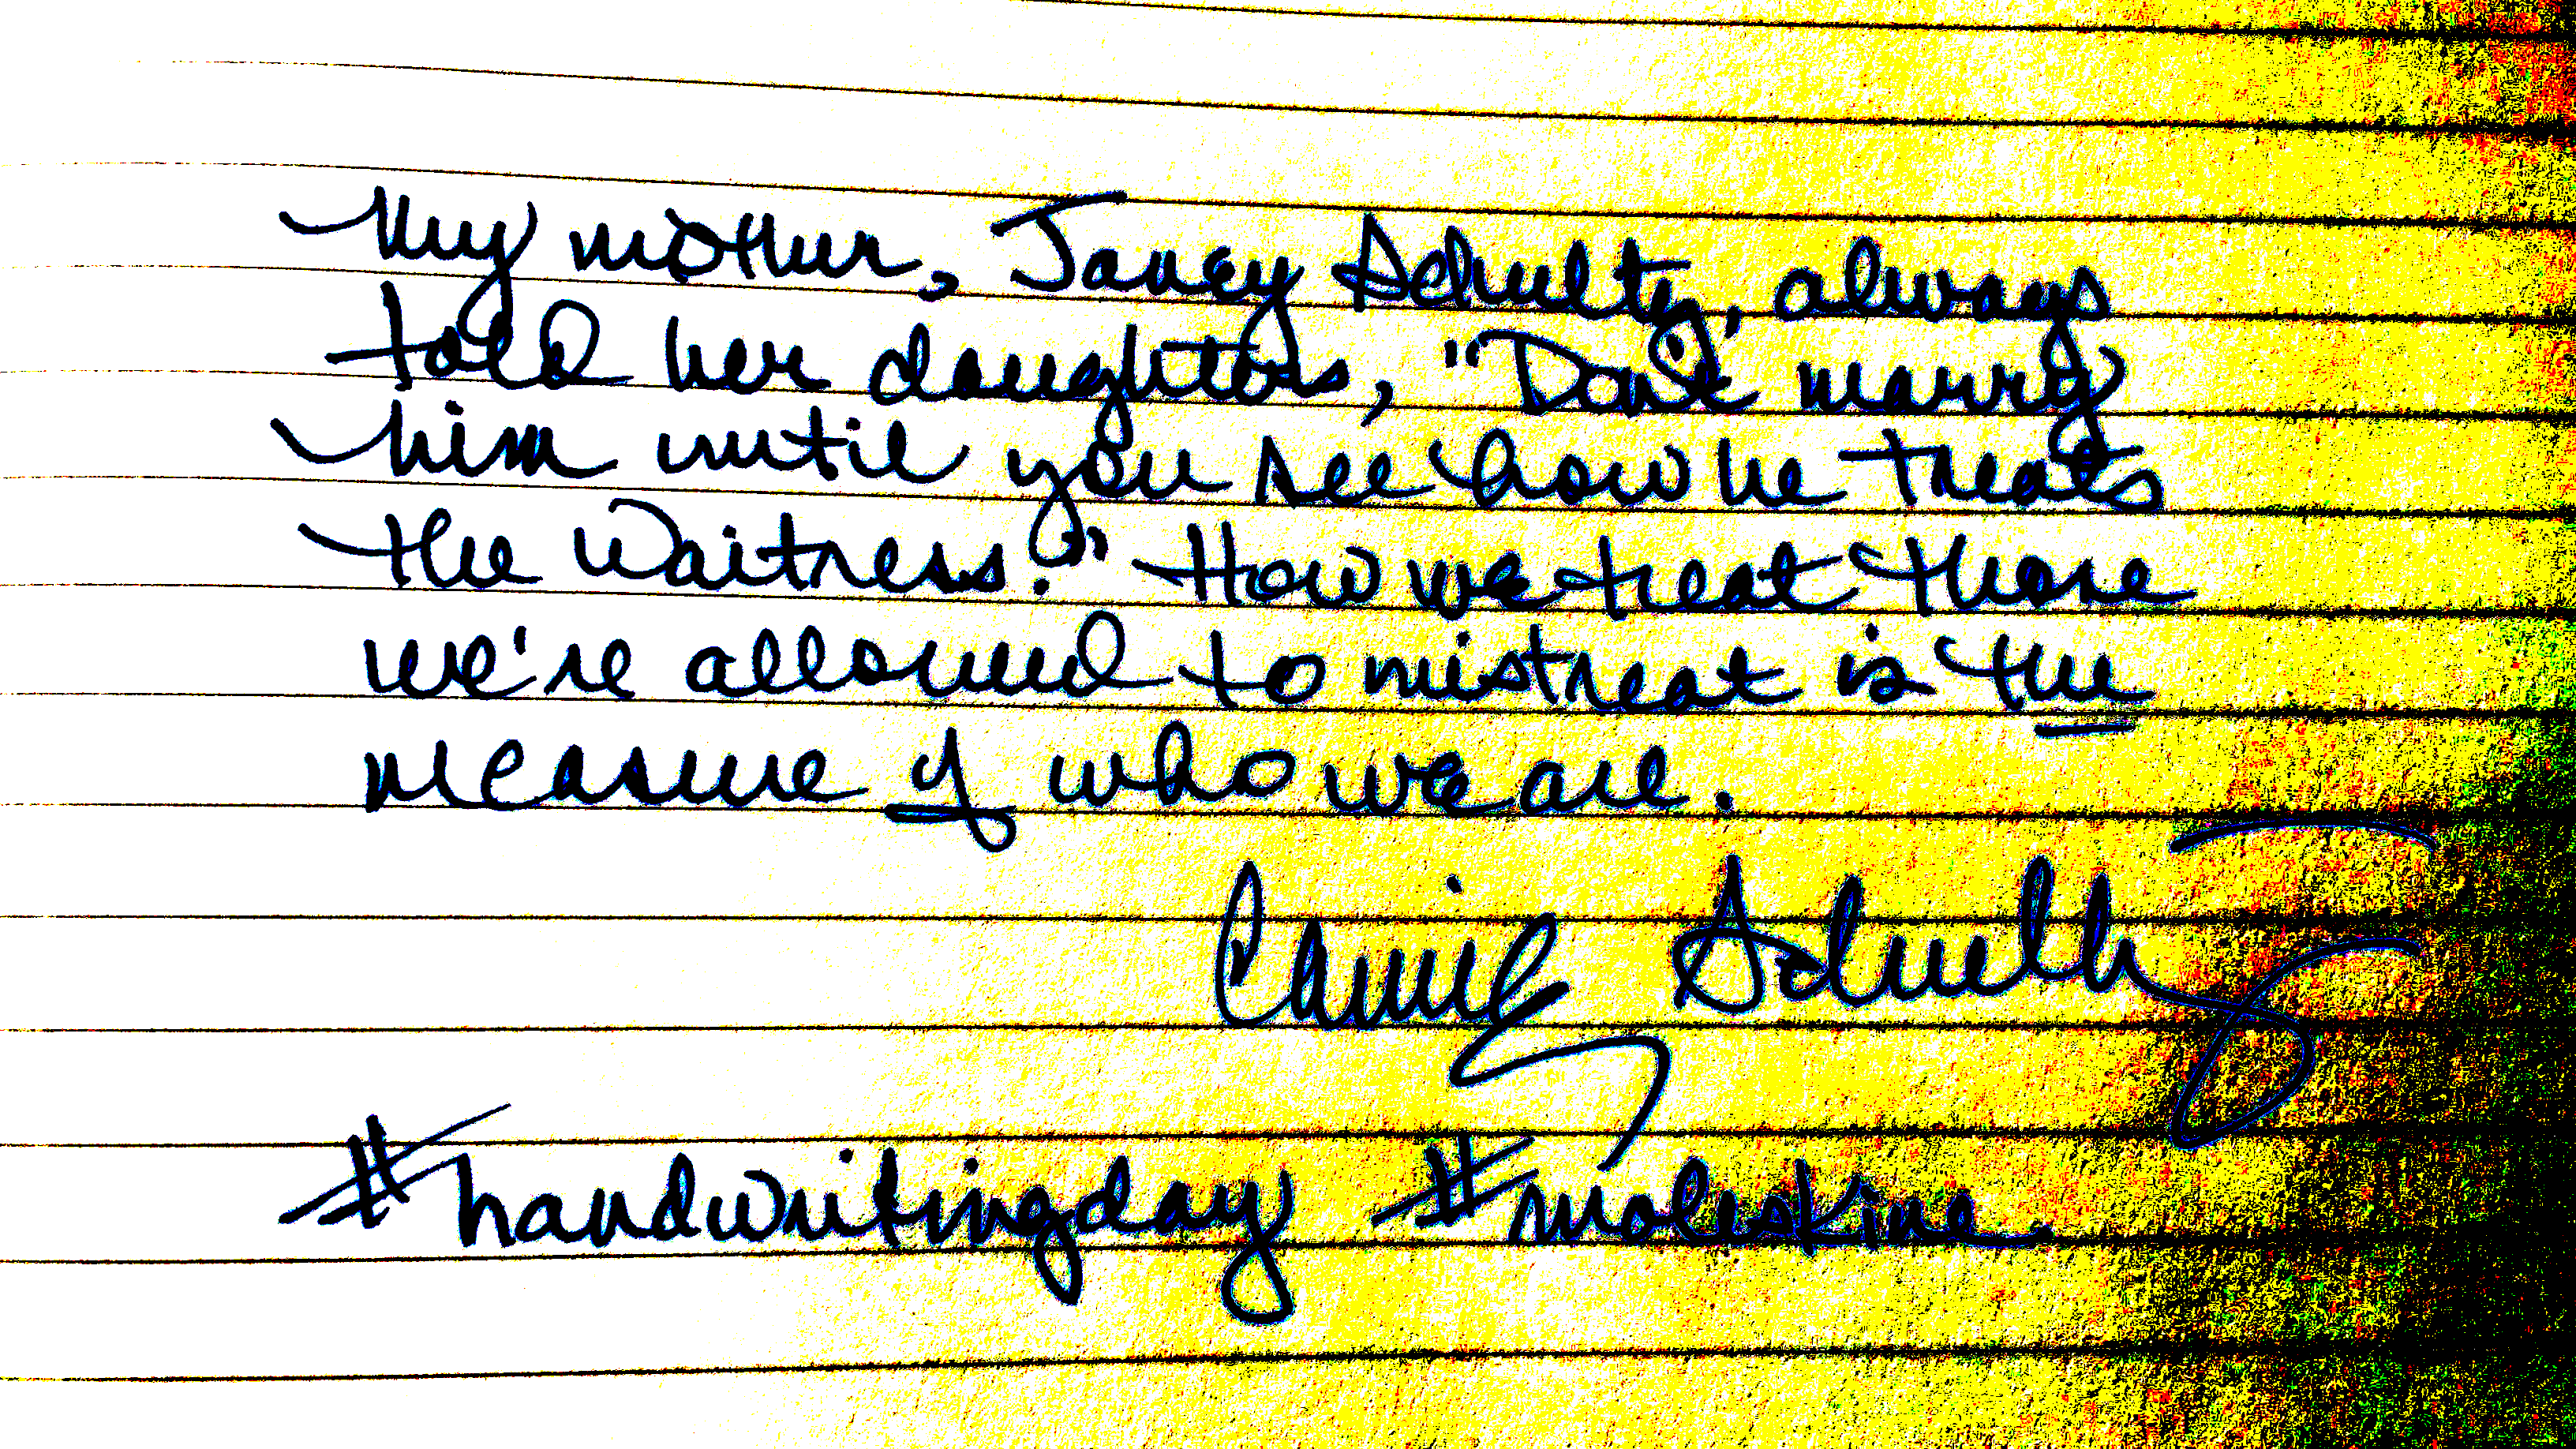

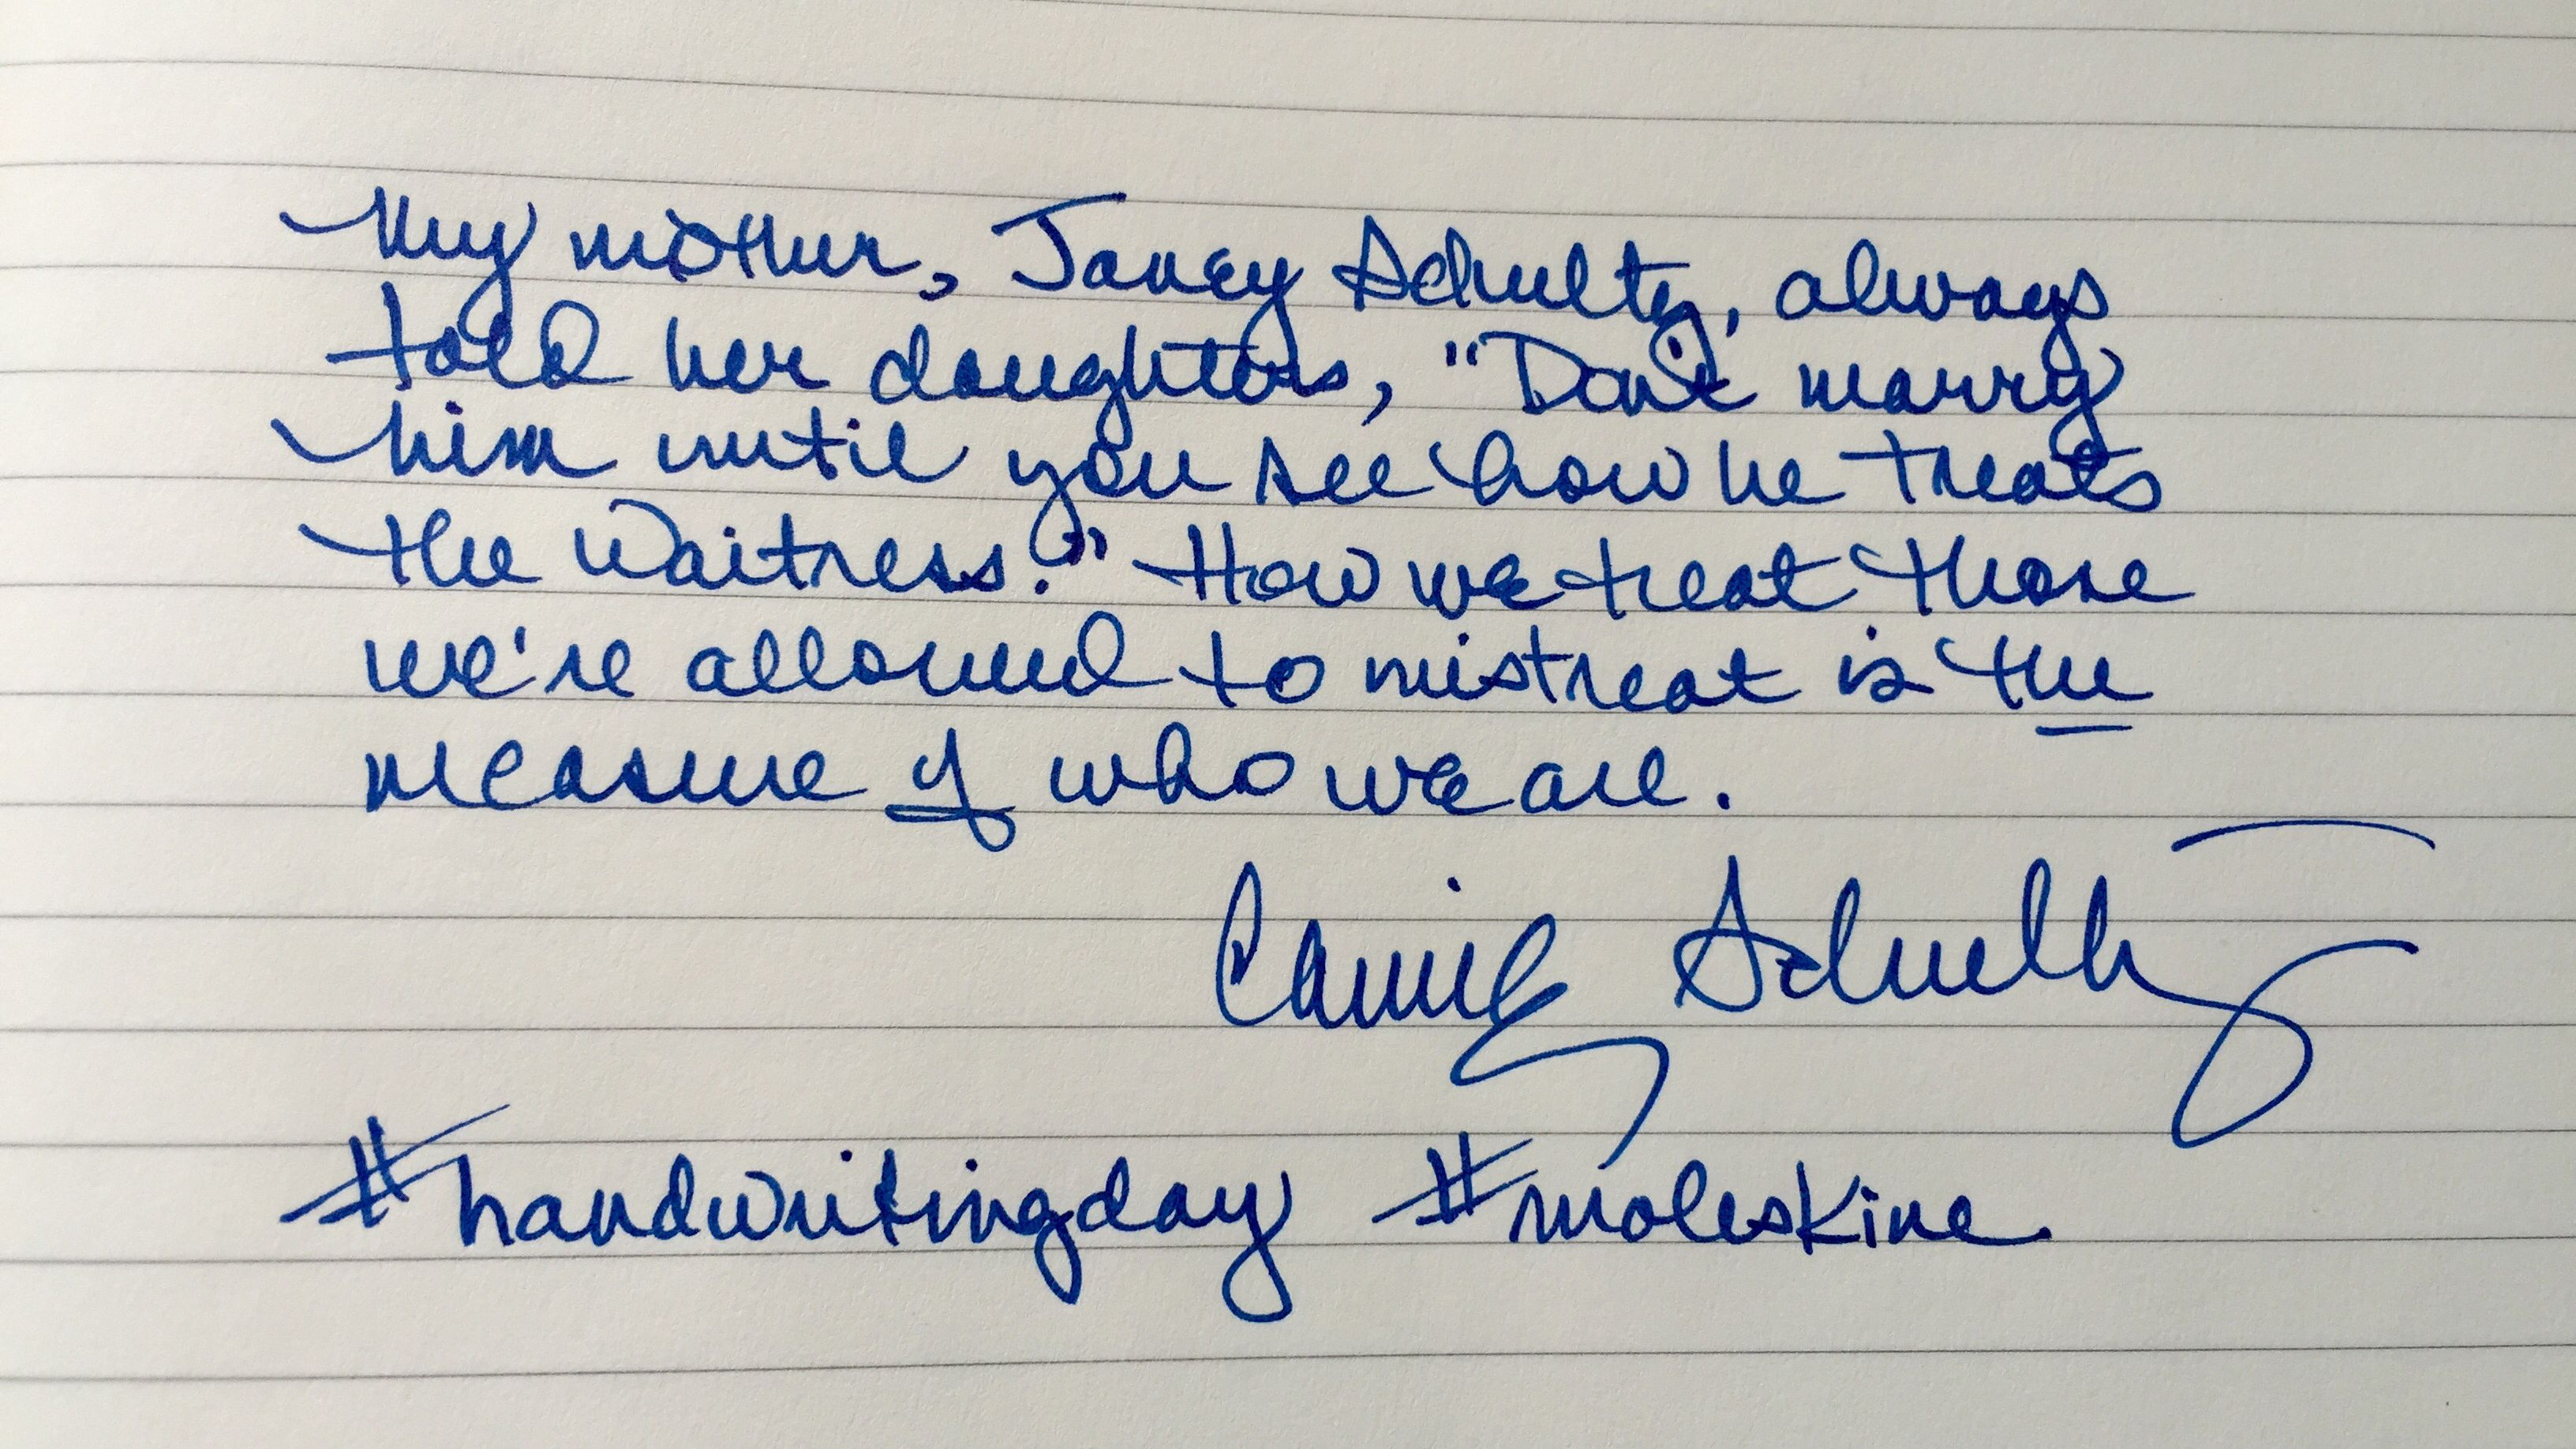

In [75]:
# lets try average all of the pixels

from PIL import Image
import numpy as np

def avg_all_pixels(img_array, step=1):
    pixel_rgb_avg = [0,0,0]
    img_size = img_array.shape
    for i in range(0, img_size[0], step): # traverse through rows
        for j in range(0, img_size[1], step): # traverse through columns
            pixel_rgb_avg[0]+=img_array[i,j,0]
            pixel_rgb_avg[1]+=img_array[i,j,1]
            pixel_rgb_avg[2]+=img_array[i,j,2]
    pixel_rgb_avg[0]/=img_size[0]*img_size[1]
    pixel_rgb_avg[1]/=img_size[0]*img_size[1]
    pixel_rgb_avg[2]/=img_size[0]*img_size[1]
    return pixel_rgb_avg

def reject_below_fresh(img_array, rgb_fresh, step=1):
    img_size = img_array.shape
    for i in range(0, img_size[0], step): # traverse through rows
        for j in range(0, img_size[1], step): # traverse through columns
            for c in range(0,len(rgb_fresh)):
                if img_array[i,j,c]>=rgb_fresh[c]:
                    img_array[i,j,c] = 255
                else:
                    img_array[i,j,c] = 0

    return img_array

def reject_below_total_fresh(img_array, rgb_fresh, step=1):
    img_size = img_array.shape
    total_fresh = sum(rgb_fresh)
    for i in range(0, img_size[0], step): # traverse through rows
        for j in range(0, img_size[1], step): # traverse through columns
            if sum(img_array[i,j]) <= total_fresh:
                img_array[i,j] = [0,0,0]
                #img_array[i,j] = rgb_fresh
                #pass
            else:
                img_array[i,j] = [255,255,255]
                

    return img_array

#image = Image.open('loadtest.png')

image = Image.open('hand_written.png')

a_image = np.array(image)

a_image_size = a_image.shape

rgb_freshold = avg_all_pixels(a_image)

#new_img = reject_below_fresh(a_image, rgb_freshold)

new_img = reject_below_fresh(a_image, rgb_freshold, step=1)


img = Image.fromarray(new_img)
#img.save('remove_below_avg.png')
img.save('hand_written_remove_below_avg.png')
print(rgb_freshold)
#img.show()
#img.show()
display(img)
display(image)